In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
#import data from sklearn
#multiclass image data
from sklearn.datasets import load_digits
digits = load_digits()

digits
# its image

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [13]:
#chk shape of digits.data
df =digits.data
print ('shape',df.shape)

shape (1797, 64)


In [8]:
#view 1st image
digits.data[0]

# this array of 1st image adds up to 64 pixel

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

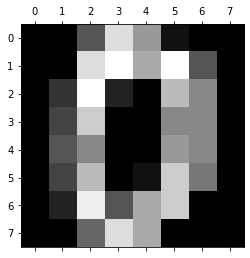

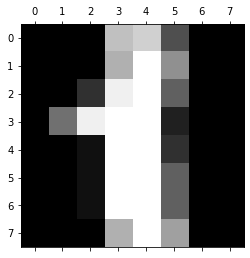

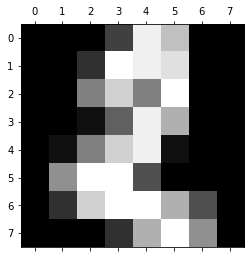

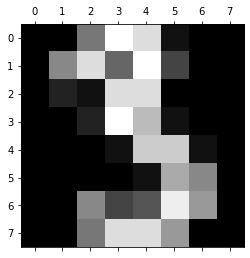

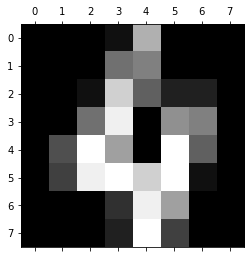

In [6]:
#plot data
plt.gray()
for i in range (5):
    plt.matshow(digits.images[i])

In [30]:
#view 1st five targets
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [41]:
#train test split 80:20 with random state fixed
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2, random_state=30)

In [53]:
#view test data
y_test[0:5]

array([8, 1, 6, 5, 3])

In [71]:
print ('X_train size', len(X_train))
print ('X_test size',len(X_test))

X_train size 1437
X_test size 360


In [67]:
#fit model
LR.fit(X_train, y_train)

LR.score(X_train,y_train)
#accuracy:correct predictions/total no of observations on train set is 1
# overfitting

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [47]:
#chk accuracy  on test data : correct predictions/total no of observations
LR.score(X_test, y_test)

0.9666666666666667

In [55]:
#predict first five from  test data
LR.predict(X_test.data[0:5])

array([8, 9, 6, 5, 3])

In [58]:
#confusion matrix on test data
y_predicted = LR.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  2,  1,  0,  0,  0,  1,  1],
       [ 0,  1, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 24,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 29]], dtype=int64)

Text(69.0, 0.5, 'Truth')

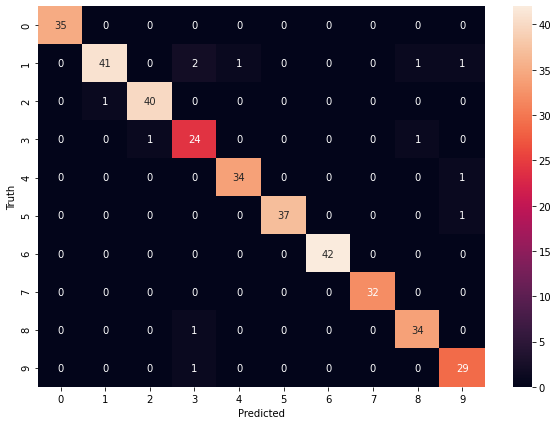

In [59]:
#plot confusion matrix for test data
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

array([6])

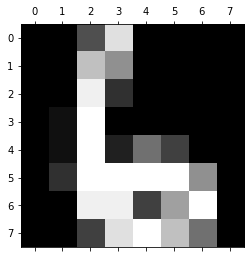

In [63]:
#chk prediction for target 67
plt.matshow(digits.images[67])
#shows the image

digits.target[67]
#it is 6



In [66]:
#chk prediction for target 67

LR.predict([digits.data[67]])
#predict using data
#predicts image as 6 accurately

array([6])